In [1]:
import os
import json
import pyqg_subgrid_experiments as pse
from pyqg_subgrid_experiments.models import ProbabilisticCNN
import argparse
%load_ext autoreload
%autoreload 2

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
parser = argparse.ArgumentParser()
parser.add_argument('--train_set', type=str, default="/scratch/zanna/data/pyqg/data/train/*.nc")
parser.add_argument('--test_set', type=str, default="/scratch/zanna/data/pyqg/data/test/*.nc")
parser.add_argument('--transfer_set', type=str, default="/scratch/zanna/data/pyqg/data/transfer/*.nc")
parser.add_argument('--save_dir', type=str, default="PCNN")
parser.add_argument('--inputs', type=str, default="u,v,q")
parser.add_argument('--targets', type=str, default="q_forcing_advection")
parser.add_argument('--zero_mean', type=int, default=1)
parser.add_argument('--num_epochs', type=int, default=50)
parser.add_argument('--layerwise_inputs', type=int, default=0)
parser.add_argument('--layerwise_targets', type=int, default=0)
args = parser.parse_args("")

In [4]:
train = pse.Dataset(args.train_set)

In [5]:
save_dir = 'PCNN'
test_dir = os.path.join(save_dir, "test")
xfer_dir = os.path.join(save_dir, "transfer")
#os.system(f"rm -r {save_dir}")
for d in [save_dir, test_dir, xfer_dir]:
    os.system(f"mkdir -p {d}") 

In [6]:
with open(f"{save_dir}/model_config.json", 'w') as f:
    f.write(json.dumps(args.__dict__))

In [7]:
param = pse.CNNParameterization.train_on(train, save_dir,
            inputs=args.inputs.split(","),
            targets=args.targets.split(","),
            layerwise_inputs=False,
            layerwise_targets=False,
            zero_mean=args.zero_mean,
            num_epochs=50,
            model_class=ProbabilisticCNN,
            learning_rate=0.0001)

Gauss Loss after Epoch 1: -0.08421729768571608, equiv MSE: 0.3108531715862018, remaining min:25.42605117956797
Gauss Loss after Epoch 2: -0.35360684185562763, equiv MSE: 0.18137044465477298, remaining min:24.855907821655272
Gauss Loss after Epoch 3: -0.40436160160119045, equiv MSE: 0.1638632233325922, remaining min:24.331542567412058
Gauss Loss after Epoch 4: -0.4637425210765179, equiv MSE: 0.14551369950154952, remaining min:23.80666460990906
Gauss Loss after Epoch 5: -0.3412964384564582, equiv MSE: 0.18589135721575933, remaining min:23.284928798675537
Gauss Loss after Epoch 6: -0.4656105053227614, equiv MSE: 0.14497107914240248, remaining min:22.768371152877805
Gauss Loss after Epoch 7: -0.5235684891395709, equiv MSE: 0.12910400253003104, remaining min:22.2415674050649
Gauss Loss after Epoch 8: -0.519488834370585, equiv MSE: 0.13016171126774612, remaining min:21.712190866470337
Gauss Loss after Epoch 9: -0.4151872321853743, equiv MSE: 0.16035350985493377, remaining min:21.194075258572

In [8]:
for i, model in enumerate(param.models):
    print('model number', i)
    model.check_channels()

model number 0
min, max std : 4.942058140500194e-08 129.955078125
min, max mean: -3.1303834915161133 4.08864688873291


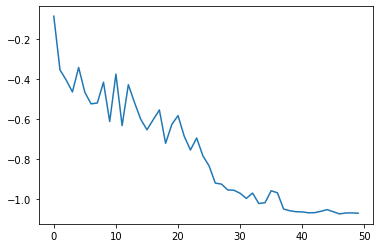

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(param.models[0].loss_history['gauss'])

In [11]:
param.models[0].training

True